Load Data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
#locate files
dataset = r'D:\VP\ARTICLE2\Data'
IGTfiles = [r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'IGT' in f]
meanfiles = [r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'mean' in f]

IGTfiles

['D:\\VP\\ARTICLE2\\Data\\A_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\Data\\A_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\Data\\A_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\Data\\A_IGTG3.csv',
 'D:\\VP\\ARTICLE2\\Data\\B_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\Data\\B_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\Data\\B_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\Data\\B_IGTG3.csv',
 'D:\\VP\\ARTICLE2\\Data\\C_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\Data\\C_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\Data\\C_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\Data\\C_IGTG3.csv',
 'D:\\VP\\ARTICLE2\\Data\\L_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\Data\\L_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\Data\\Z_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\Data\\Z_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\Data\\Z_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\Data\\Z_IGTG3.csv']

In [32]:
#Create dataframe for IGT values for 10 hour index
IGT = pd.DataFrame(index = np.arange(10*60*3),columns = np.arange(len(IGTfiles)))
means = pd.DataFrame(index = np.arange(10*60*3),columns = np.arange(len(meanfiles)))

# datafile = pd.read_csv(IGTfiles[0],names = ['seconds','IGT'],index_col = 0).values

#readdata
for i,col in enumerate(IGT.columns):
    IGTdata = pd.read_csv(IGTfiles[i],names = ['seconds','IGT'],index_col = 0)
    meandata = pd.read_csv(meanfiles[i],names = ['seconds','mean'],index_col = 0)
    IGT[col].iloc[:min(10*60*3,len(IGTdata))] = np.array(IGTdata.iloc[:min(10*60*3,len(IGTdata))]['IGT'])
    means[col].iloc[:min(10*60*3,len(meandata))] = np.array(meandata.iloc[:min(10*60*3,len(meandata))]['mean'])

IGT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,62.61636,0.0,0.0,0.0,0.0,0.370272,0.0,0.0,0.38788,0.0,0.0,298.035913,6.051846,0.0,0.0
1,0.0,0.0,0.0,100.927139,0.0,0.0,0.0,0.0,9.92565,0.0,0.0,34.72686,0.0,0.0,796.681673,139.648973,37.325176,0.0
2,0.0,0.0,0.802099,221.878899,0.0,0.0,0.0,0.0,35.020554,0.0,0.880782,67.771587,0.0,0.0,1418.403647,336.385556,1120.30561,0.0
3,0.0,0.0,0.802099,474.862935,0.0,0.0,0.0,0.0,192.619702,3.173742,22.926859,198.643655,0.0,0.0,1879.0361,809.788518,2386.372979,0.0
4,0.0,0.0,0.802099,545.762018,0.0,0.0,0.0,0.063529,351.050187,3.173742,406.998346,294.711039,0.0,0.0,2095.053098,1538.471185,3261.218967,0.0


Plot Copper

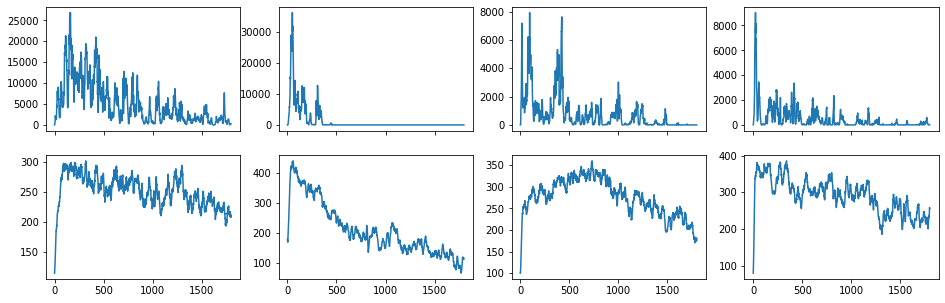

In [47]:
copp_cols = [8,9,10,11]
fig_copp,ax_copp = plt.subplots(2,4,figsize = (16,5),sharex = True)
for a,i in enumerate(copp_cols): 
    ax_copp[0,a].plot(IGT[i])
    ax_copp[1,a].plot(means[i])

Plot Zinc

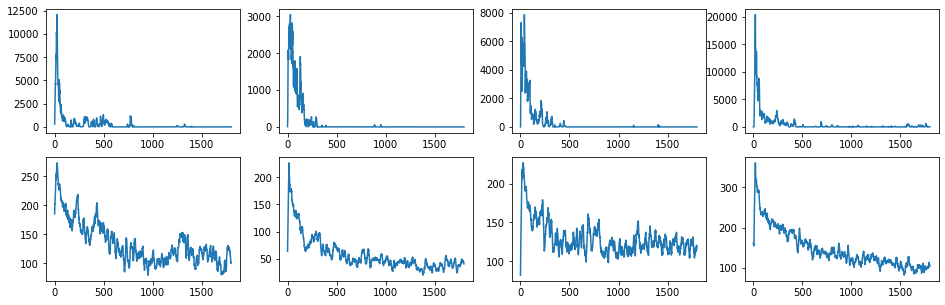

In [48]:
zinc_cols = [14,15,16,17]
fig_zinc,ax_zinc = plt.subplots(2,4,figsize = (16,5))
for a,i in enumerate(zinc_cols): 
    ax_zinc[0,a].plot(IGT[i])
    ax_zinc[1,a].plot(means[i])

Plot Lindane - 2 missing data files

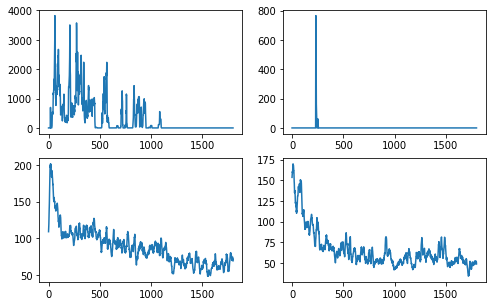

In [49]:
lind_cols = [12,13]
fig_lind,ax_lind = plt.subplots(2,2,figsize = (8,5))
for a,i in enumerate(lind_cols): 
    ax_lind[0,a].plot(IGT[i])
    ax_lind[1,a].plot(means[i])

Plot alphaEndosulfan

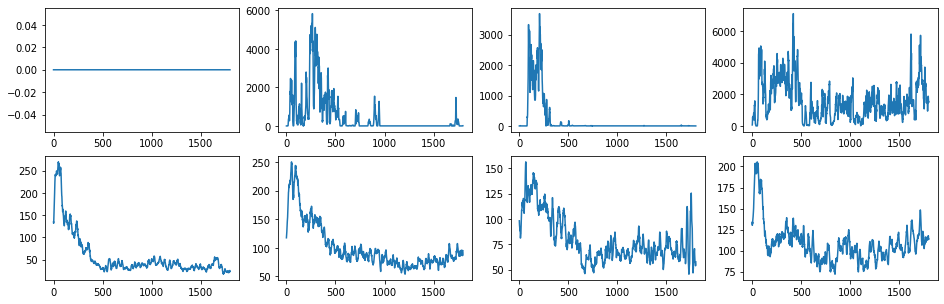

In [50]:
alphaE_cols = [0,1,2,3]
fig_alphaE,ax_alphaE = plt.subplots(2,4,figsize = (16,5))
for a,i in enumerate(alphaE_cols): 
    ax_alphaE[0,a].plot(IGT[i])
    ax_alphaE[1,a].plot(means[i])

Plot betaEndosulfan

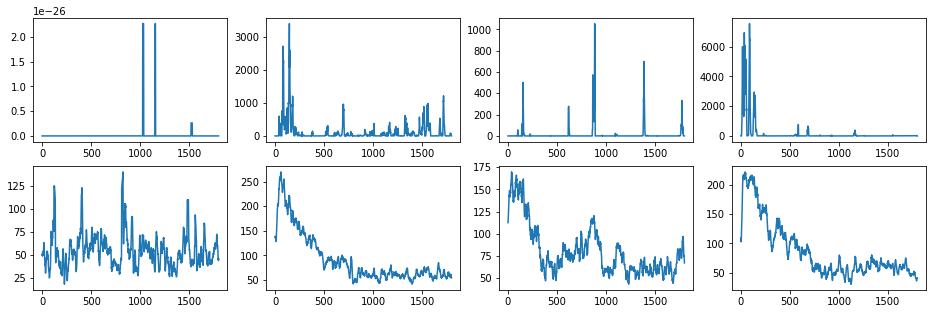

In [53]:
betaE_cols = [4,5,6,7]
fig_betaE,ax_betaE = plt.subplots(2,4,figsize = (16,5))
for a,i in enumerate(betaE_cols): 
    ax_betaE[0,a].plot(IGT[i])
    ax_betaE[1,a].plot(means[i])

FDA Smoothing of curves - Starting with IGT

same process with means

Combination of the two measures - concatenation